# Confounding Example: Finding causal effects from observed data

Suppose you are given some data with treatment and outcome. Can you determine whether the treatment causes the outcome, or is the correlation purely due to another common cause?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
import datasets, plotter

# Let's create a mystery dataset. Need to find if there is a causal effect.

Creating the dataset. It is generated from either of two models:
* **Model 1**: Treatment does cause outcome. 
* **Model 2**: Treatment does not cause outcome. All observed correlation is due to a common cause.

In [3]:
rvar = 1 if np.random.uniform() >0.5 else 0
data_dict = datasets.xy_dataset(10000, effect=rvar, sd_error=0.2)                                               
df = data_dict['df']                                                                                 
print(df[["Treatment", "Outcome", "w0"]].head())                                                                                                     
                                                                                                                                                                                                         

   Treatment    Outcome        w0
0   9.867573  19.709706  3.890592
1   3.688974   7.612040 -2.087339
2  10.015731  20.050267  3.963668
3   9.074060  18.274344  3.137773
4   7.189781  14.403745  1.272638


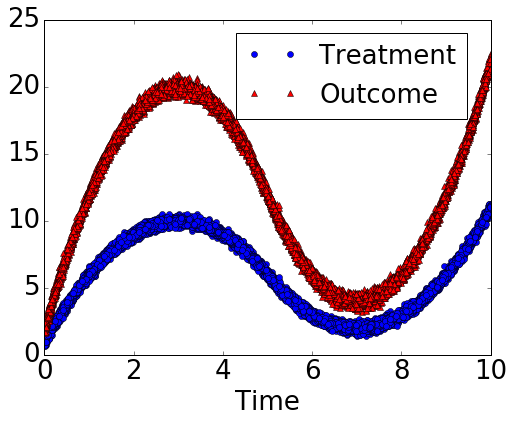

In [4]:
plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], df[data_dict["outcome_name"]],
                             df[data_dict["time_val"]])                                                       

This simulated pattern is inspired by the actual correlation between searches for "ice cream" and "swimming" in Canada.

<img src="icecream-swimming.png">

# Using DoWhy to resolve the mystery: *Does Treatment cause Outcome variable?*
## STEP 1: Model the problem as a causal graph
Initializing the causal model.

<img src="causal_model.png">

## STEP 2: Identify causal effect using properties of the formal causal graph
Identify the causal effect using properties of the causal graph.

Estimand type: ate
### Estimand : 1
Estimand name: backdoor

Estimand expression:

    d                              
──────────(Expectation(Outcome|w0))

dTreatment                         

Estimand assumption 1, 

Unconfoundedness: If U→Treatment and U→Outcome then P(Outcome|Treatment,w0,U) = P(Outcome|Treatment,w0)

### Estimand : 2
Estimand name: iv

No such variable found!

## STEP 3: Estimate the causal effect

Once we have the identified estimand, can use any statistical method to estimate the causal effect. 

Let's use Linear Regression for simplicity.

Causal Estimate is 1.00172959456


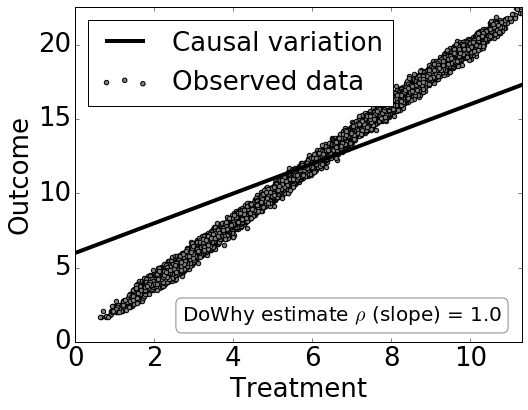

In [5]:
  def linear_causal_estimate(df):
        observed_common_causes = df[['w0']]
        treatment_2d = df["Treatment"].values.reshape(len(df["Treatment"]), -1)
        
        features = np.concatenate((treatment_2d, observed_common_causes),
                axis=1)
        model = linear_model.LinearRegression()
        model.fit(features, df["Outcome"])
        coefficients = model.coef_
        estimate= {'value':coefficients[0],
                   'intercept':model.intercept_}
        return estimate


estimate = linear_causal_estimate(df)
print("Causal Estimate is " + str(estimate["value"]))

# Plot Slope of line between treamtent and outcome =causal effect                                                                                                 
plotter.plot_causal_effect(estimate, df[data_dict["treatment_name"]], df[data_dict["outcome_name"]])

### Checking if the estimate is correct

In [6]:
print("Our estimate is " + str(estimate["value"])) 
print ("Actual true causal effect was {0}".format(rvar))

Our estimate is 1.00172959456
Actual true causal effect was 1
